# Protótipo de Validação do Modelo com Dados da Literatura

In [1]:
# Importando bibliotecas externas
# matplotlib - biblioteca para criação de gráficos
from matplotlib import pyplot as plt
# pandas - biblioteca para manipulação de dados
import pandas as pd
# numpy - biblioteca numérica em Python
import numpy as np
# scipy - biblioteca direcionada para estudos científicos
import scipy.optimize as optimize

# batchpy - biblioteca com os modelos cinéticos de adsorção
from batchpy import batch as bh

Os dados utilizados na primeira etapa foram retirados do artigo: Effect of concentration in the equilibrium and kinetics of adsorption of acetylsalicylic acid on ZnAl layered double hydroxide. (https://doi.org/10.1016/j.jece.2020.103991) 

![](./asa_removal/img/asa_t_vs_qt.jpg)

Os dados foram retirados dos gráficos utilizando o software: WebPlotDigitizer (https://automeris.io/WebPlotDigitizer/)


In [3]:
# asa = acetylsalicylic acid
asa_data ={
    'dosage_vs_removal':pd.read_csv('./asa_removal/csv/dosage_vs_removal.csv', sep=';'),
    '20mg_1' : pd.read_csv('./asa_removal/csv/qt_vs_time_20mg_1.csv', sep=';'),
    '20mg_2' : pd.read_csv('./asa_removal/csv/qt_vs_time_20mg_2.csv', sep=';'),
    '50mg' : pd.read_csv('./asa_removal/csv/qt_vs_time_50mg.csv', sep=';'),
    '100mg' : pd.read_csv('./asa_removal/csv/qt_vs_time_100mg.csv', sep=';')
}

Uma nova coluna contendo a fração de soluto removida, $v$, é criada a partir da quantidade adsorvida, $q_t$, para cada um dos expertimentos em batelada utilizando-se da expressão
$$
v = 1 - q_t \frac{W}{V_b}
$$
onde $W$ representa a massa de adsorvente na batelada, e $V_b$ o volume da fase bulk.

In [4]:
asa_data['20mg_1'].insert(2, 'v', 1 - asa_data['20mg_1']['q']*3/20, True)
asa_data['20mg_2'].insert(2, 'v', 1 - asa_data['20mg_2']['q']*3/20, True)
asa_data['50mg'].insert(2, 'v', 1 - asa_data['50mg']['q']*3/50, True)
asa_data['100mg'].insert(2, 'v', 1 - asa_data['100mg']['q']*3/100, True)


Segundo o artigo analisado uma série de experimentos foram realizados para definir a razão $W/V_b$ na qual a quantidade de remoção de soluto é máxima. No modelo de difusão intrapartíucula a relação entre a fração $W/V_b$ e a quantidade de soluto removida é dada pelo valor de $\alpha$ definido por
$$
\alpha = \left[\frac{\varepsilon_p}{\rho_p} + (1-\varepsilon_p)K \right] \frac{W}{V_b}
$$

a relação entre alpha e a quantidade removida é dada por

$$
\alpha = \left(\frac{Removal}{100} \right)^{-1} - 1
$$

logo, os dados do gráfico abaixo são utilizados para calcular os valores de $\alpha$ para esse sistema de soluto-adsorvente. Com os valores de $\alpha$ calculados é encontrada uma curva do tipo $y = ax$ que ajusta os dados dos experimentos. 
![](./asa_removal/img/asa_dosage_vs_removal.jpg)

In [14]:
dosage_exp = asa_data['dosage_vs_removal']['dosage']
alpha_exp = 1/(1-asa_data['dosage_vs_removal']['removal']/100) - 1

constants, _ = optimize.curve_fit(lambda x,a: a*x, dosage_exp, alpha_exp)
dosage_fit = [0, 5]
alpha_fit = constants*dosage_fit

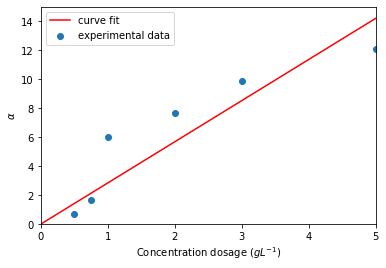

In [15]:
# plot the results
plt.scatter(dosage_exp, alpha_exp, label='experimental data')
plt.plot(dosage_fit, alpha_fit, label='curve fit', color='r')

# set x and y axis labels
plt.xlabel(r'Concentration dosage $(g L^{-1})$')
plt.ylabel(r'$\alpha$')

# set x and y limits 
plt.xlim(0,5)
plt.ylim(0,15)

plt.legend()
plt.show()

In [98]:

def func(x, bi, D_R2):
    v=np.zeros(x.shape)
    eps = 1e-6
    s=2
    a = alfa(3, 2.838095)
    t = x * D_R2
    for i in range(len(t)):
        v[i] = bh.finite_batch_bulk(t[i],bi,a,s,eps)
    return v

N=100
a_guess = 1 # <-- You have to supply a guess for kd
bi_guess = 1
x_exp = (data['20mg_1']['t'].append(data['20mg_2']['t']))
x_exp = x_exp.reset_index()['t']
y_exp = (data['20mg_1']['v'].append(data['20mg_2']['v']))
y_exp = y_exp.reset_index()['v']
print(x_exp)
print(y_exp)


0       4.615139
1       9.442446
2      19.628453
3      29.327836
4      45.004905
5      59.599723
6      74.788221
7      89.402504
8     119.709427
9     179.762683
10    239.298172
11      5.167784
12      9.897209
13     20.304305
14     30.052551
15     44.805179
16     60.183192
17     75.218655
18     90.273148
19    120.069770
20    180.302835
21    240.207788
Name: t, dtype: float64
0     0.505216
1     0.422122
2     0.237050
3     0.157734
4     0.127518
5     0.097302
6     0.169065
7     0.176619
8     0.184173
9     0.161511
10    0.184173
11    0.503556
12    0.422280
13    0.235565
14    0.154289
15    0.121339
16    0.094979
17    0.165272
18    0.171862
19    0.180649
20    0.156485
21    0.180649
Name: v, dtype: float64


[1.24143130e+01 7.06536001e-04]


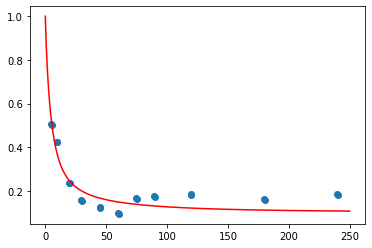

In [100]:
guess = [1,0.001]
constants, _ = optimize.curve_fit(func, x_exp, y_exp, p0 = guess)
print(constants)
x_fit = np.linspace(0.0, 250 ,1000)
y_fit = func(x_fit, constants[0], constants[1])
plt.scatter(x_exp, y_exp)

plt.plot(x_fit, y_fit ,'-r')
plt.show()

In [2]:
ctab_data = pd.read_csv('./ctab_removal/ctab_removal.csv', sep=';')
exp_data = {
'30':ctab_data.iloc[range(8)],
'60':ctab_data.iloc[range(8,16)],
'90':ctab_data.iloc[range(16,24)],
'120':ctab_data.iloc[range(24,32)],
'150':ctab_data.iloc[range(32,40)],
'180':ctab_data.iloc[range(40,48)],
'240':ctab_data.iloc[range(48,56)],
'300':ctab_data.iloc[range(56,64)],
}


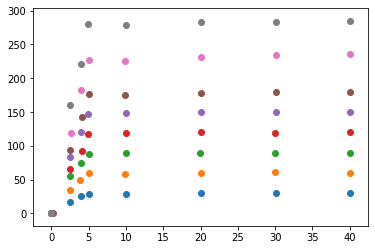

In [24]:
for values in exp_data.values():
    plt.scatter(values['t'],values['q'])

In [46]:
def cb(co, qe, v, w):
    #if  co - qe * w/v < 0:
        #return 0
    #else:
    return co - qe * w/v
eq_data = {
'qe':[],
'ce':[]
}
for key in exp_data.keys(): 
    exp_data[key] = exp_data[key].reset_index(drop=True)
    exp_data[key]['cb'] = cb(int(key), exp_data[key]['q'], 0.1, 0.1)
    exp_data[key]['v'] = exp_data[key]['cb']/int(key)

    eq_data['qe'].append(exp_data[key]['q'][7])
    eq_data['ce'].append(cb(int(key), exp_data[key]['q'][7], 0.1, 0.1))




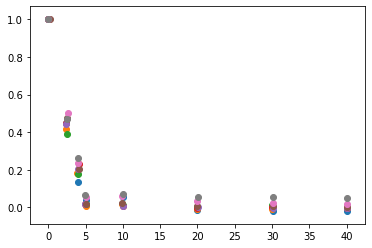

In [47]:
for key in exp_data.keys():
    plt.scatter(exp_data[key]['t'],exp_data[key]['v'])
plt.show()

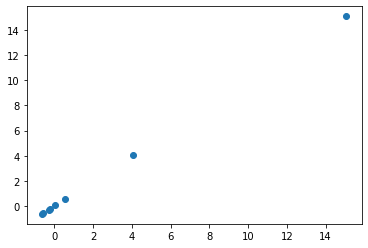

In [38]:
plt.scatter(eq_data['ce'], eq_data['ce'])
plt.show()